<a href="https://colab.research.google.com/github/atharvaw1/image-colorization/blob/master/colorizing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D,Input,UpSampling2D
from google.colab import files
from google.colab import drive

In [0]:
#run this to call import files from local drive
def import_pics():
  drive.mount('/pics_color')
  uploaded = files.upload()
  !ls
  os.getcwd()
  items = os.listdir('/content')
  for each_image in items:
    if each_image.endswith(".jpg"):
      full_path = "/content/" + each_image
      image = cv2.imread(full_path)


In [0]:
def img_pro():
  items = os.listdir('/content') 
  img_paths=[]
  print(items)
  for each_image in items:
    if each_image.endswith(".jpg"):
      full_path = "/content/" + each_image
      img_paths.append(full_path)
      print(full_path)
      
  pross_img=[]    
  grey=[]
  for full_path in img_paths:
    img=mpimg.imread(full_path)
    img = cv2.resize(img,dsize=(256,256))
    img=np.array(img)
    with tf.Session() as sess:
      t_img = tf.convert_to_tensor((1.0/255)*img, np.float32)
      yuv_img = tf.image.rgb_to_yuv(t_img)
      imgnp = np.array(sess.run(yuv_img))

      pross_img.append(imgnp)
  return np.array(pross_img) 




In [0]:
def yuv2rgb(img):
  with tf.Session() as sess:
    t_img = tf.convert_to_tensor(img,np.float32)
    rgb_img = tf.image.yuv_to_rgb(t_img)
    imgnp = np.array(sess.run(rgb_img))
    imgnp *= 255
    imgnp = imgnp.astype(np.uint8)
    
    return imgnp

In [0]:
def split_set(pross_img,per):
  print(pross_img.shape)
  x_train = pross_img[:int(per*len(pross_img))+1,:,:,:1]
  y_train = pross_img[:int(per*len(pross_img))+1,:,:,1:]
  x_test = pross_img[int(per*len(pross_img))+1:,:,:,:1]
  y_test = pross_img[int(per*len(pross_img))+1:,:,:,1:]
  '''print(x_train[0].shape)
  print(len(x_train))
  for i in range(len(x_train)):
    x_train[i] = np.reshape(x_train[i],(256,256,1))
    y_train[i] = np.reshape(y_train[i],(256,256,2))
  for i in range(len(x_test)):
    x_test[i] = np.reshape(x_test[i],(256,256,1))
    y_test[i] = np.reshape(y_test[i],(256,256,2))'''
  
  
  return x_train,y_train,x_test,y_test
  

In [0]:
def make_model():
  
  X_input = Input((256,256,1))
  X = Conv2D(64,(3,3),activation="relu",padding="same")(X_input)
  X = Conv2D(64,(3,3),activation="relu",padding="same",strides=2)(X)
  X = Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(X)
  X = Conv2D(256, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)(X)
  X = Conv2D(512, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(256, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X = UpSampling2D((2, 2))(X)
  X = Conv2D(64, (3, 3), activation='relu', padding='same')(X)
  X = UpSampling2D((2, 2))(X)
  X = Conv2D(32, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(2, (3, 3), activation='tanh', padding='same')(X)
  result = UpSampling2D((2, 2))(X)
  
  model = Model(inputs=[X_input],outputs=[result])
  
  return model


In [0]:

pross_img = img_pro()
model = make_model()
model.compile(loss="mse",optimizer="rmsprop")
x_train,y_train,x_test,y_test = split_set(pross_img,1)
print(x_train.shape)
model.fit(x_train, y_train, epochs=2)
#loss_and_metrics = model.evaluate(x_test, y_test)'''


['.config', '2.png', 'images9M8ILG1U.png', 'landscape_main_5.jpg', 'untitled.png', 'images.jpg', 'images (3).jpg', 'imagesHHBRIVFU.png', '4.png', 'imagesSE3WEC4J.png', '3 (1).png', '3.png', 'images9P0FIJAC.png', 'images (2).jpg', 'images (4).jpg', 'download (1).jpg', 'images (5).jpg', 'imagesMN2NA7IJ.png', 'images99BRCVZE.png', '72700a14a2a02b35fe25ed088f8895bc_M.jpg', 'photo-1469827160215-9d29e96e72f4.jpg', 'images (1).jpg', 'imagesDPMOWC8W.png', 'images9L8FWFVG.png', '5.png', 'imagesQ9CW94RT.png', 'main-qimg-b42d56dbacd4726a1e4f1db351fa5ce3-c.png', 'sample_data']
/content/landscape_main_5.jpg
/content/images.jpg
/content/images (3).jpg
/content/images (2).jpg
/content/images (4).jpg
/content/download (1).jpg
/content/images (5).jpg
/content/72700a14a2a02b35fe25ed088f8895bc_M.jpg
/content/photo-1469827160215-9d29e96e72f4.jpg
/content/images (1).jpg
(10, 256, 256, 3)
(10, 256, 256, 1)
Epoch 1/2
10/10 [==============================] - 12s 1s/step - loss: 0.0089
Epoch 2/2
10/10 [=======

(256, 256, 3)


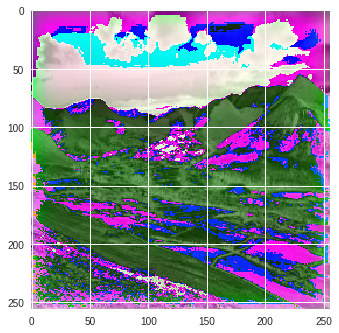

In [0]:
z=7
result = model.predict(x_train[z:z+1])
#img = np.concatenate((x_train[0,:,:,:],result[0,:,:,:]),axis=2)
img = np.zeros((256,256,3))
img[:,:,0] = x_train[z][:,:,0]
img[:,:,1:] = result[0]
print(img.shape)
img = yuv2rgb(img)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
img = (255-img)
plt.imshow(img)

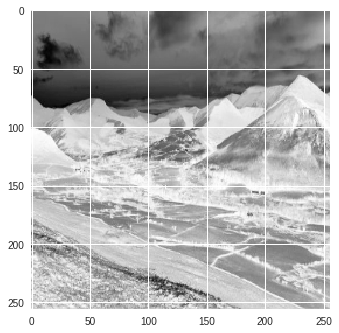

In [0]:
plt.imshow(x_train[z][:,:,0])
